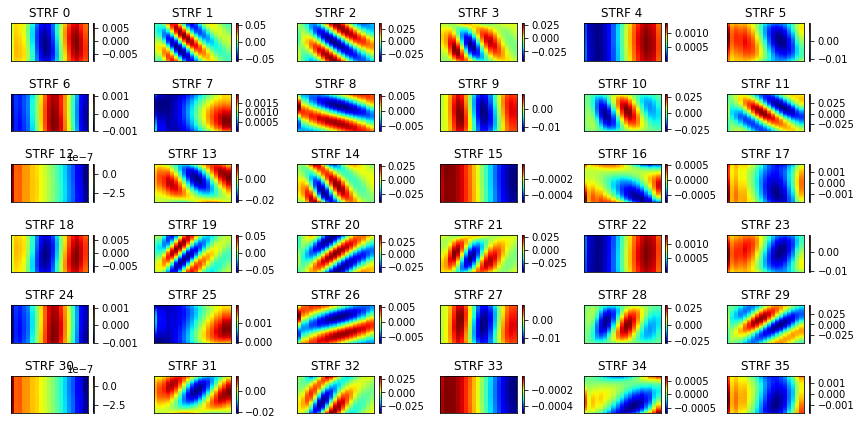

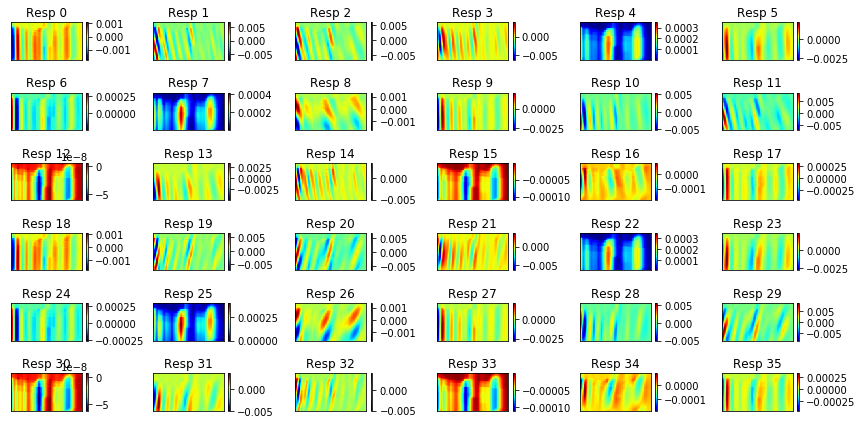

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

from audlib.nn.cnn import STRFConv
from audlib.plot import specgram
from audlib.quickstart import welcome
from audlib.sig.fbanks import ConstantQ

layer = STRFConv(100, 24, .2, 1.5, 18)
sig, sr = welcome()
cqbank = ConstantQ(sr, 100, bins_per_octave=12)
spec = cqbank.cqt(sig, 100)
strfs = layer.strfs()
response = layer(torch.from_numpy(np.abs(spec)**2))
# Plot filters and responses
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ii, ax in enumerate(axs.flat):
    specgram(strfs[ii].detach().numpy(), ax)
    ax.set_title(f"STRF {ii}")
plt.tight_layout()

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ii, ax in enumerate(axs.flat):
    specgram(response[0, ii].detach().numpy(), ax)
    ax.set_title(f"Resp {ii}")
plt.tight_layout()

plt.show()